<a href="https://colab.research.google.com/github/manishbayesian/bayesianbookpub/blob/main/Chapter_2_Distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 2 - Distributions

In [ ]:
from scipy import special
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import random
import numpy as np

sns.set_theme(style="darkgrid")
pd.set_option('display.precision', 3)
pd.set_option('display.float_format',  '{:,.3f}'.format)

### Example 2.3 - Distribution of Sum of n Dice
Let $X_n$ be the sum of $n$ six-faced symmetric dice rolls. If $f_{X_n}$ is the PMF of $X_n$ we use the recursion relation:

$f_{X_n}(x) = \frac{1}{6}\sum_{k=1}^{6}f_{X_{n-1}}(x-k)$

where $f_{X_n}(x) = 0$ for $x < n$ and $x > 6n$.

In [ ]:
from functools import lru_cache
@lru_cache(maxsize = 100)
def f_DiceSum(n, x):

  if x < n or x > 6*n:
    return 0
  if n == 1:
    return 1./6
  return (1./6)*sum([f_DiceSum(n-1,x-k) for k in range(1,7)])

In [ ]:
def compute_and_plot_dice_sum(n):
  distro = [(k,f_DiceSum(n,k)) for k in range(n,6*n+1)]
  df = pd.DataFrame(distro,columns=['x','$f_X(x)$'])
  sns.barplot(x='x',y='$f_X(x)$',data=df).set_title('Distribution $f_{X_n}$ of sum $X_n$ of $n$ Dice, for n='+str(n))
  plt.show()
  return distro


def compute_and_plot_cumulative_dice_sum(n):
  distro = [(k,f_DiceSum(n,k)) for k in range(n,6*n+1)]
  x, pmf = list(zip(*distro))
  cumdistro  = zip(x,[sum(pmf[:(j+1)]) for j in range(len(pmf))])
  df = pd.DataFrame(cumdistro,columns=['x','$F_X(x)$'])
  sns.barplot(x='x',y='$F_X(x)$',data=df).set_title('Cumulative $F_{X_n}$ of sum $X_n$ of $n$ Dice, for n='+str(n))
  plt.show()

def compute_summary_stats(distro):
  stats = {}
  x, pmf = list(zip(*distro))
 # cumdistro  = zip(x,[sum(pmf[:(j+1)]) for j in range(len(pmf))])
  x = np.asarray(x)
  pmf = np.asarray(pmf)
  stats['mean'] = round(sum(x*pmf),3)
  stats['mode'] = [round(v,3) for v in x[np.where(pmf == np.max(pmf))[0]].tolist()]
  stats['median'] = round(x[np.where(np.cumsum(pmf)>=0.5)[0][0]],3)
  p25 = x[np.where(np.cumsum(pmf)>=0.25)[0][0]]
  p50 = x[np.where(np.cumsum(pmf)>=0.75)[0][0]]
  stats['var'] = round(sum(((x-stats['mean'])**2)*pmf),3)
  stats['std'] = round(np.sqrt(stats['var']),3)
  stats['IQR'] = round(p50 - p25,3)
  stats['MAD'] = round(sum(np.abs(x-stats['median'])*pmf),3)
  return pd.DataFrame.from_dict(stats, orient='index')



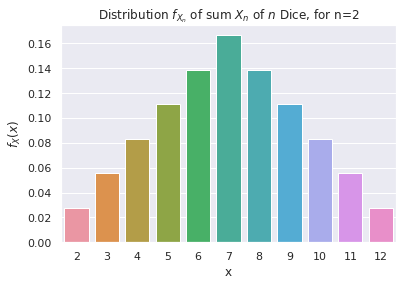

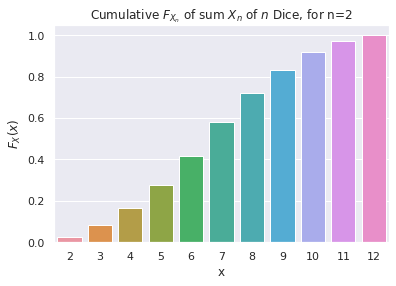

In [ ]:
s_2 = compute_and_plot_dice_sum(2)
compute_and_plot_cumulative_dice_sum(2)

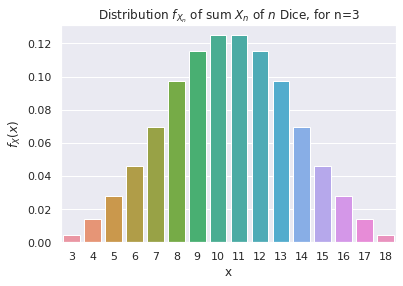

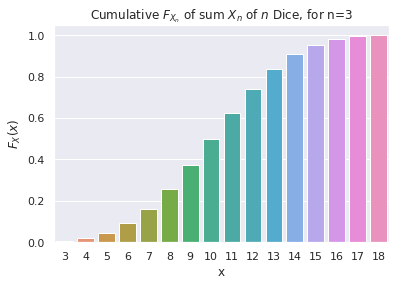

In [ ]:
s_3 = compute_and_plot_dice_sum(3)
compute_and_plot_cumulative_dice_sum(3)

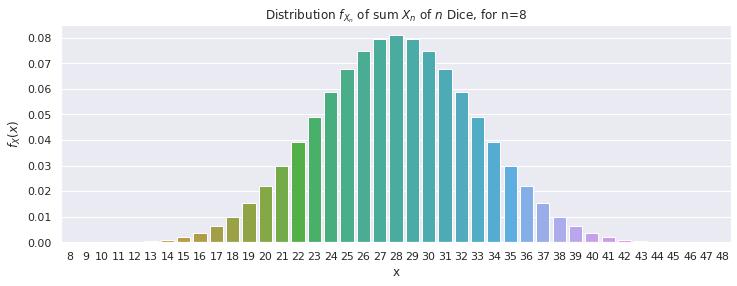

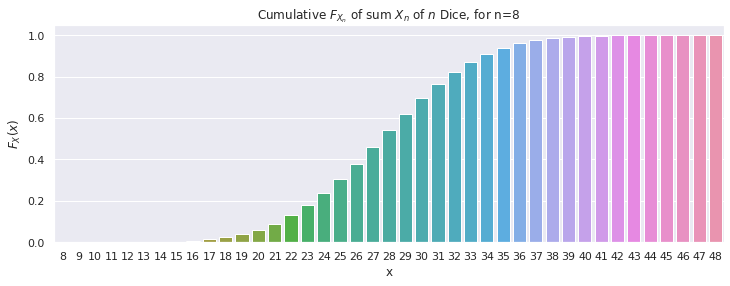

In [ ]:
plt.figure(figsize=(12,4))
s_8 = compute_and_plot_dice_sum(8)
plt.figure(figsize=(12,4))
compute_and_plot_cumulative_dice_sum(8)

In [ ]:
### Show stats
stats = pd.concat((compute_summary_stats(s_2),
                   compute_summary_stats(s_3),
                   compute_summary_stats(s_8)), axis=1)
stats.columns=['n=2','n=2','n=8']
display(stats)

,n=2,n=2,n=8
mean,7.000,10.500,28.000
mode,[7],[10],[28]
median,7,11,28
var,5.833,8.750,23.333
std,2.415,2.958,4.830
IQR,4,5,6
MAD,1.944,2.417,3.867


#### Average of digits in the n-Dice throw example.
Instead of sum, Let $Y_n$ be the average of $n$ six-faced symmetric dice rolls. Then $Y_n = \frac{1}{n} X_n$. Lets compute and plot the distribution of $Y_n$ for various values of $n$, and this time also compute the mean, median, mode, variance and standard deviations.

In [ ]:
def compute_and_plot_dice_average(n):
  distro = [(k/n,f_DiceSum(n,k)) for k in range(n,6*n+1)]
  df = pd.DataFrame(distro,columns=['y','$f_Y(y)$'])
  ax = sns.barplot(x='y',y='$f_Y(y)$',data=df)
  ax.set_title('Distribution $f_{Y_n}$ of average of digits, $Y_n$ of $n$ Dice, for n='+str(n))
  t = ax.get_xticks()
  l = ax.get_xticklabels()
  ax.set_xticks([0,int(len(t)/2),len(t)-1])
  ax.set_xticklabels([l[0],l[int(len(t)/2)],l[-1]])
  plt.tight_layout()
  plt.show()
  return distro



  

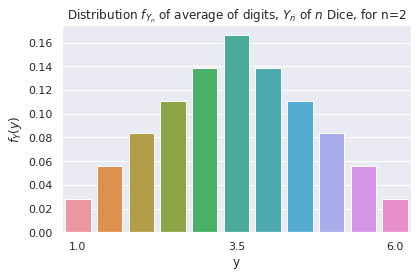

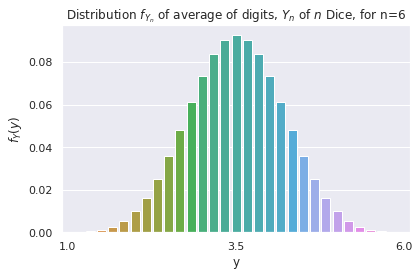

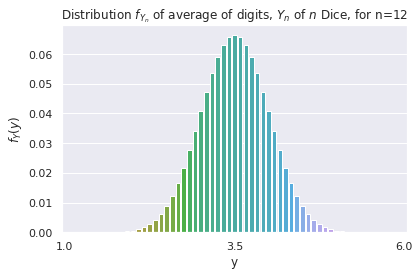

--------------------
    Stats for Y_n
--------------------


,n=2,n=6,n=12
mean,3.500,3.500,3.500
mode,[3.5],[3.5],[3.5]
median,3.500,3.500,3.500
var,1.458,0.486,0.243
std,1.207,0.697,0.493
IQR,2.000,1.000,0.667
MAD,0.972,0.559,0.394


In [ ]:
d_2 = compute_and_plot_dice_average(2)
d_6 = compute_and_plot_dice_average(6)
d_12 = compute_and_plot_dice_average(12)

print('--------------------')
print('    Stats for Y_n')
print('--------------------')
stats = pd.concat((compute_summary_stats(d_2),
                   compute_summary_stats(d_6),
                   compute_summary_stats(d_12)), axis=1)
stats.columns=['n=2','n=6','n=12']
display(stats)

## Example D3. Dart Throw Example.
We simulate the dart throw example, where the dart radius is 1 ft, by generating random points in a square of 2ft x 2ft, discarding all values that fall outside of the circle since we assume it always lands in the circle.. We want to th calculate the probability that the dart lands within R ft of the center.

In [ ]:
from collections import Counter

In [ ]:
def dart_position(radius=1.):
    """
    Simulate the random throw of a dart. Note that if it lands outside the circle, we discard it.
    Return the distance of landed dart from the center.
    """
    ## choose random point in square around circle
    x = radius*(-1+2*random.random())
    y = radius*(-1+2*random.random())
    ## repeat till get something inside
    if x**2 + y**2 > radius**2 :
      return dart_position(radius)
    return np.sqrt(x**2 + y**2)


In [ ]:
### Now use simulation to calculated CDF of the 
## i.e. Pr(dart_position <= R)

NUM_THROWS = 100000
dart_cnts = Counter()

for R in np.linspace(0,1.0,101):
  num_hits = 0
  for i in range(NUM_THROWS):
    if dart_position() <= R:
      num_hits += 1
  dart_cnts[R] += num_hits

## convert counts to probabilities
dart_cdf = pd.DataFrame([(R,cnt/NUM_THROWS) for R,cnt in dart_cnts.items()], columns=['R','CDF'])

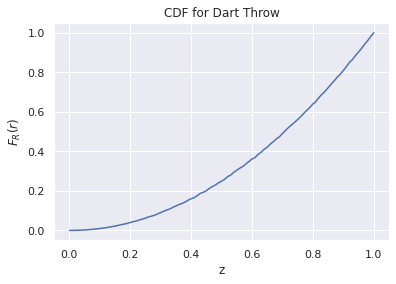

In [ ]:
#dart_cdf_df = pd.DataFrame.from_dict(dart_cdf,orient='index',columns=['R','CDF_R'])
sns.lineplot(data=dart_cdf, x='R',y='CDF').set(xlabel='z',ylabel='$F_R(r)$',title='CDF for Dart Throw')
plt.show()

#### Interesting Application of Dart Probability Problem.
An interesting application of the dart probability problem is as follows. Given that a dart lands in a square dart of side length 1, what is the probability that the dart lands inside a circle of radius $\frac{1}{2}$ inscribed in the square? The answer is $\frac{\pi}{4}$ 

In [ ]:
NUM_THROWS = 100000
in_circle = 0
for _ in range(NUM_THROWS):
  ## get random dart position, assume square of side 1.0 and centered at (0,0)
  x,y = random.random() - 0.5, random.random() - 0.5
  if x**2 + y**2 <= 0.5*0.5: ## inside circle of radius 0.5
    in_circle += 1
print('4*Probability dart lands in circle = {:.05f}'.format(4.*in_circle/NUM_THROWS))

4*Probability dart lands in circle = 3.13740


## Example D5. Function of a Random Variable.
We will use the CDF for $R$, the distance of the dart from the center, calculated above to plot the corresponding CDF of $Z = \pi R^2$. Since we are using a discrete approximation of the original distribution, this simply means changing the x-axis of the plot to the transformed value.  

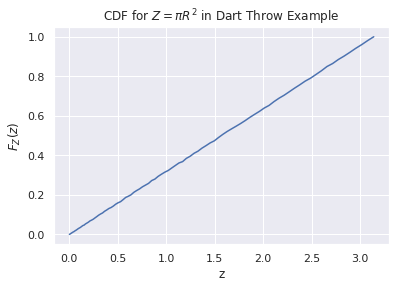

In [ ]:
dart_cdf['Z'] = dart_cdf.R.map(lambda x: np.pi*x*x)
sns.lineplot(data=dart_cdf, x='Z',y='CDF').set(xlabel='z',ylabel='$F_Z(z)$',title='CDF for $Z=\pi R^2$ in Dart Throw Example')
plt.show()

### Example - Transformations of two variables using Simulation
$X,Y$ are two randomly thrown dart positions (distance from center). What is the distribution of $Z=\frac{X}{Y}$ ?

#### Simulation Procedure
In the previous example, we c way to calculate CDF was fairly ineffcient since for each $r$ we calculated $F_R(r)$ by simulating the throws and discarding values above $r$. In this simulation procedure, we will instead directly generate data points, and then bin them to compute the CDF. 
Binning can be done directly, or we can just use the builtin `sns.kdeplot` or `plt.hist` methods.

In [ ]:
## simulate data
NUM_THROWS = 10000
ratio_dat = []
for _ in range(NUM_THROWS):
   X = dart_position()
   Y = dart_position()
   ratio_dat.append(X/Y)

In [ ]:
### Compute CDF directly from list of simulated data
def get_cdf(X, data):
  return [sum(x>np.asarray(ratio_dat))/len(data) for x in X]

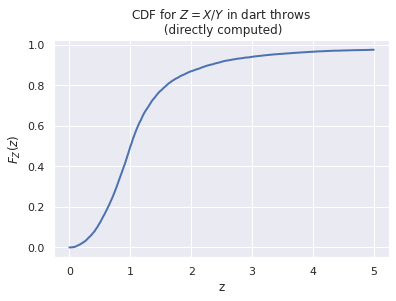

In [ ]:
Z = np.linspace(0,5.,1000)
ratio_cdf = pd.DataFrame([(z,p) for z,p in zip(Z,get_cdf(Z, ratio_dat))], columns=['Z','CDF'])

plt.figure(figsize=(6,4))
sns.lineplot(data=ratio_cdf, x='Z',y='CDF',linewidth=2).set(xlabel='z',ylabel='$F_Z(z)$',
                                                title='CDF for $Z=X/Y$ in dart throws\n (directly computed)')
                                             
plt.show() 

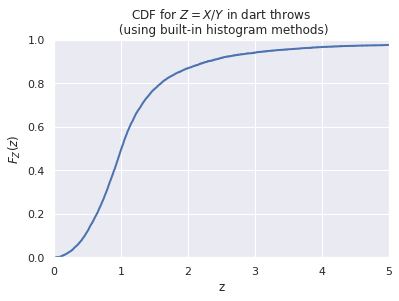

In [ ]:
### CDF Using built-in histogram methods
plt.figure(figsize=(6,4))
ax = sns.ecdfplot(ratio_dat, linewidth=2)
ax.set_xlim(0,5)
ax.set( xlim=(0,5), xlabel='z',ylabel='$F_Z(z)$', 
       title='CDF for $Z=X/Y$ in dart throws\n (using built-in histogram methods)' )
plt.show()


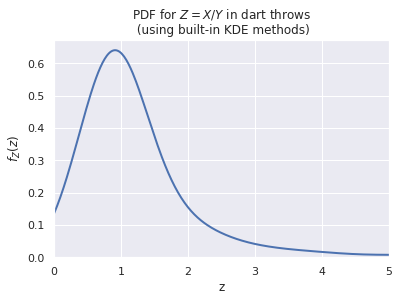

In [ ]:
### PDF Using built-in histogram (kdeplot) methods
plt.figure(figsize=(6,4))
ax = sns.kdeplot(ratio_dat,gridsize=10000, linewidth=2, )
ax.set_xlim(0,5)
ax.set( xlim=(0,5), xlabel='z',ylabel='$f_Z(z)$', 
       title='PDF for $Z=X/Y$ in dart throws\n (using built-in KDE methods)')
plt.show()


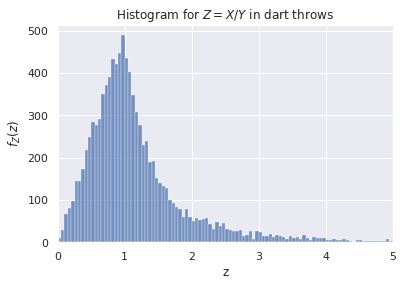

In [ ]:
### PDF visualization using histogram
plt.figure(figsize=(6,4))
ax = sns.histplot(ratio_dat,binrange=(0,5),bins=100)
ax.set( xlim=(0,5), xlabel='z',ylabel='$f_Z(z)$', 
       title='Histogram for $Z=X/Y$ in dart throws')
plt.show()


In [ ]:
np.sqrt(0.25), np.sqrt(0.5), np.sqrt(0.75)

(0.5, 0.7071067811865476, 0.8660254037844386)

## Example D?. Expected Value of Distribution Using Simulation
We revisit the dart problem, and calculate the expected value of dart position $R$ as the long-running average of samples. Using direct integration we found that $E[R] = \frac{2}{3}$, and variance $V[R] = \frac{1}{18}$. Also, for  $100p$'th percentile value $x_p = p^{\frac{1}{2}}$. These values are, respectively, for $p=\frac{1}{4}, \frac{1}{2}, \frac{3}{4}$ as $\frac{1}{2}, \frac{1}{\sqrt{2}}$ and $\frac{\sqrt{3}}{2}$.

In [ ]:
NUM_THROWS = 50000
dart_dat = [dart_position() for _ in range(NUM_THROWS)]
E_R = np.mean(dart_dat)
print('E[R]     = {:.03f}'.format(E_R))
V_R = np.var(dart_dat)
print('V[R]     = {:.03f}'.format(V_R))
p_25 = np.percentile(dart_dat, 25)
print('P_25[R]  = {:.03f}'.format(p_25))
med_R = np.median(dart_dat)
print('Med[R]   = {:.03f}'.format(med_R))
p_75 = np.percentile(dart_dat, 75)
print('P_75[R]  = {:.03f}'.format(p_75))


# We can also just use pandas to compute these at once.
## all summary statistics
summ = pd.DataFrame(dart_dat,columns=['R']).describe()
display(summ)

E[R]     = 0.667
V[R]     = 0.056
P_25[R]  = 0.499
Med[R]   = 0.707
P_75[R]  = 0.867


,R
count,"50,000.000"
mean,0.667
std,0.236
min,0.003
25%,0.499
50%,0.707
75%,0.867
max,1.000
